In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm

In [2]:
# Loading Dataset
data = pd.read_csv("C:/Users/sudha/Downloads/Google Play Store Apps -20241106T082114Z-001/Google Play Store Apps/googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Head rows of the Dataset
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# Checking for the null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# Dealing with the Null values 
data['Rating'].fillna(0, inplace=True)
data['Type'].fillna(0, inplace=True)
data['Content Rating'].fillna(0, inplace=True)
data['Current Ver'].fillna(0, inplace=True)
data['Android Ver'].fillna(0, inplace=True)

In [6]:
# Checking for the null values again
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
# Checking the numericals values
data.describe()

,Rating
count,10841.000000
mean,3.623190
std,1.521678
min,0.000000
25%,3.700000
50%,4.200000
75%,4.500000
max,19.000000


In [19]:
# Increase plot size for better readability
plt.rcParams['figure.figsize'] = (12, 6)

C:\Users\sudha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


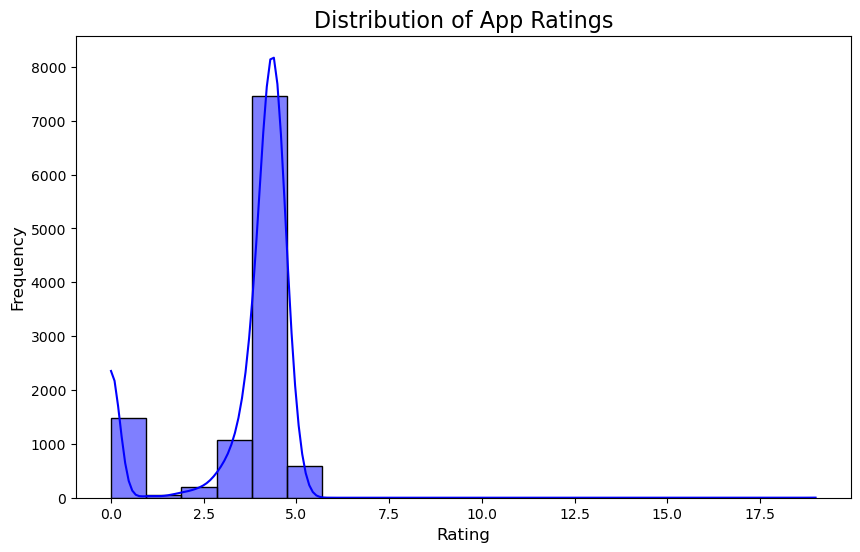

In [20]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

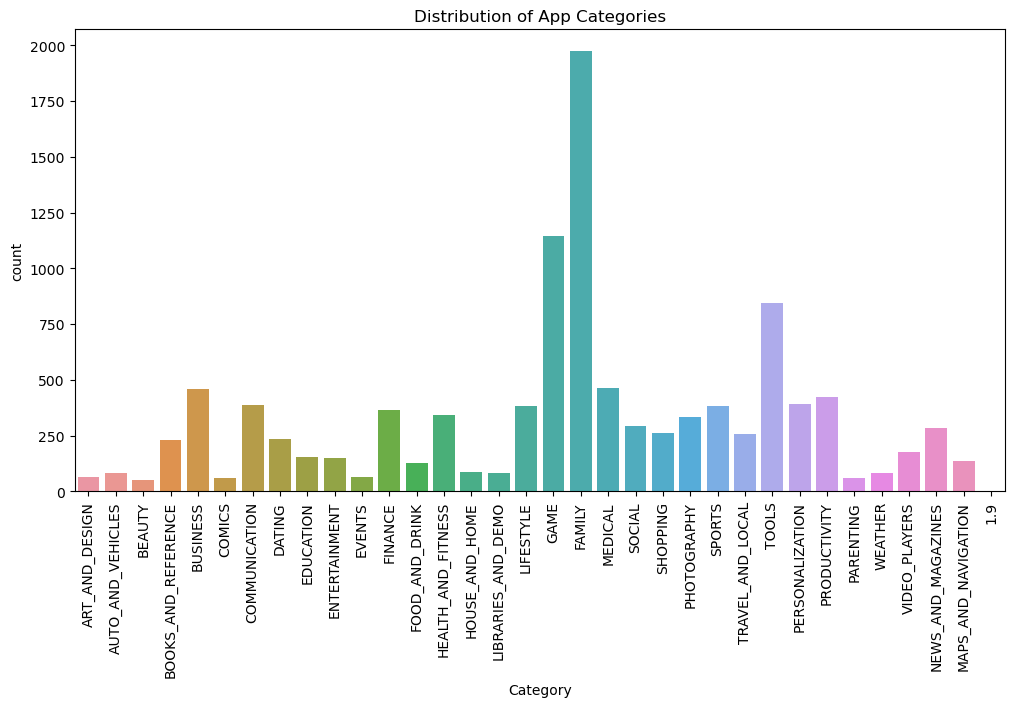

In [16]:
#Visualization of Distribution of App categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of App Categories')
plt.show()

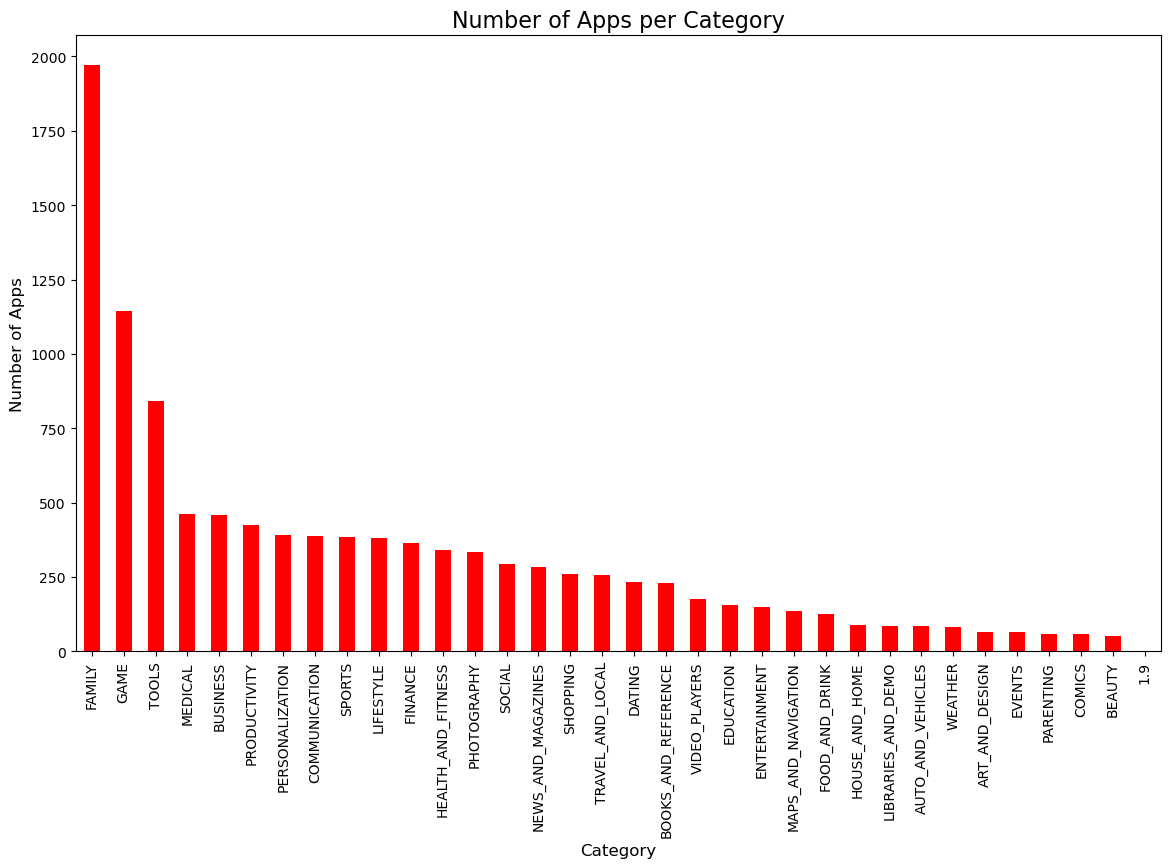

In [22]:
# Number of Apps per Category
plt.figure(figsize=(14, 8))
data['Category'].value_counts().plot(kind='bar', color='red')
plt.title('Number of Apps per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=90)
plt.show()

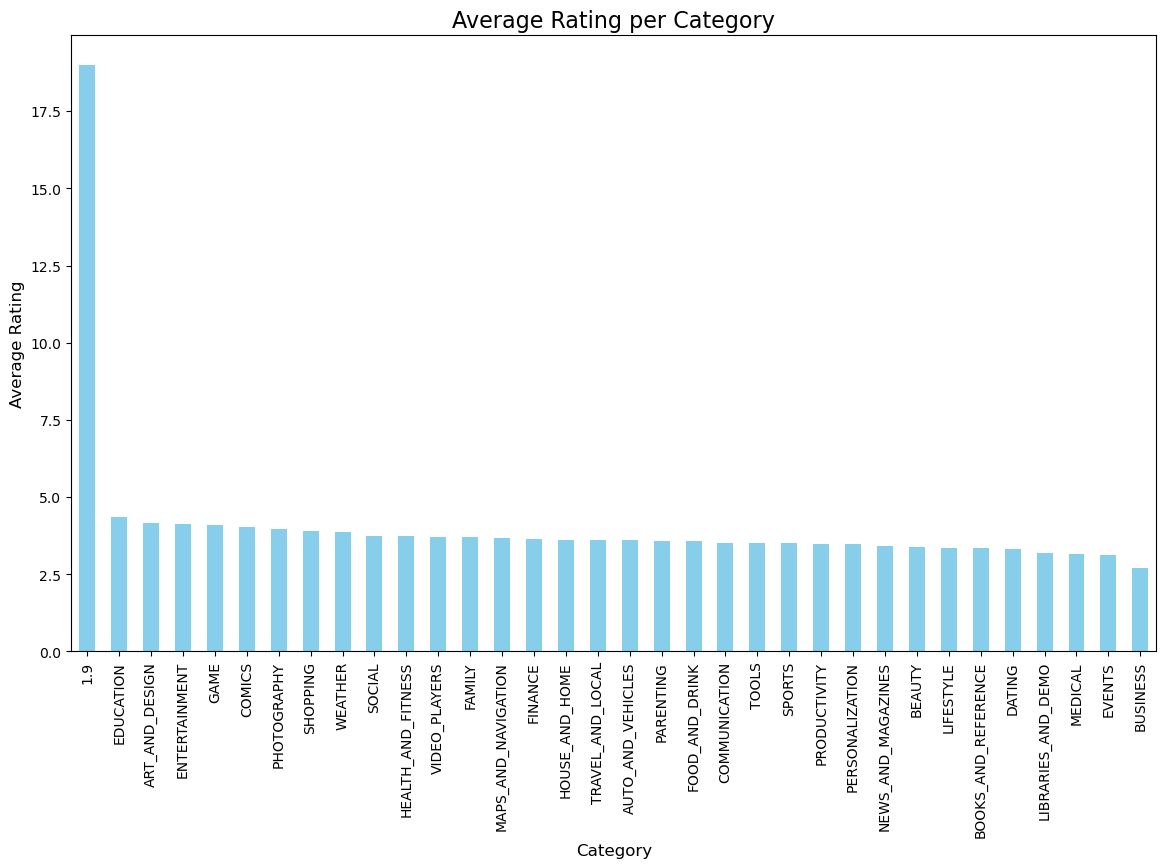

In [33]:
# Average Rating per Category
category_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
category_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

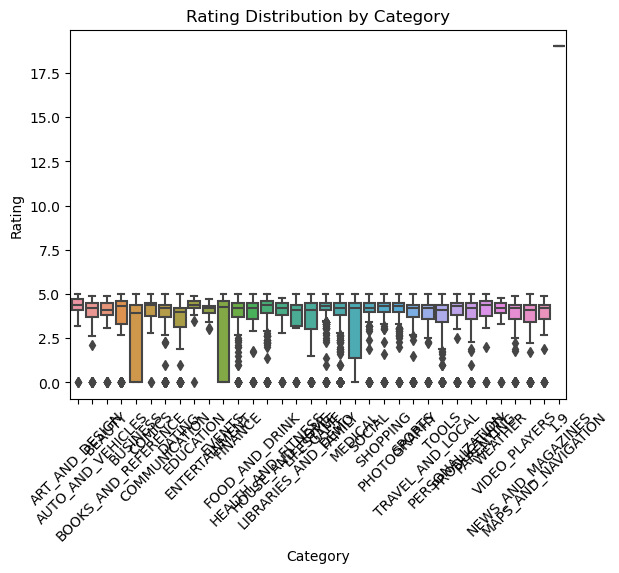

In [13]:
# Visualization of Box Plot of Ratings by Category
sns.boxplot(x='Category', y='Rating', data=data)
plt.title('Rating Distribution by Category')
plt.xticks(rotation=45)
plt.show()

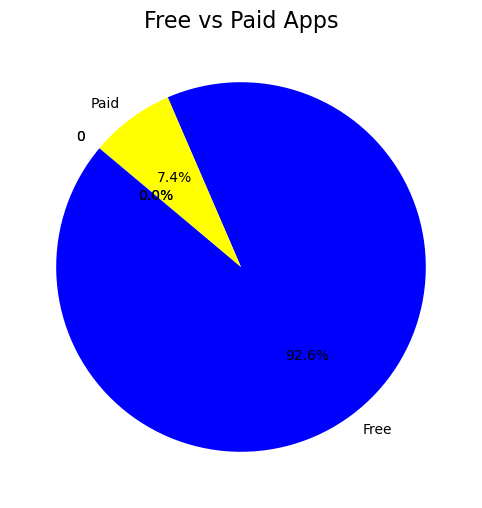

In [26]:
# Free vs Paid Apps
plt.figure(figsize=(8, 6))
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'yellow'], startangle=140)
plt.title('Free vs Paid Apps', fontsize=16)
plt.ylabel('')
plt.show()

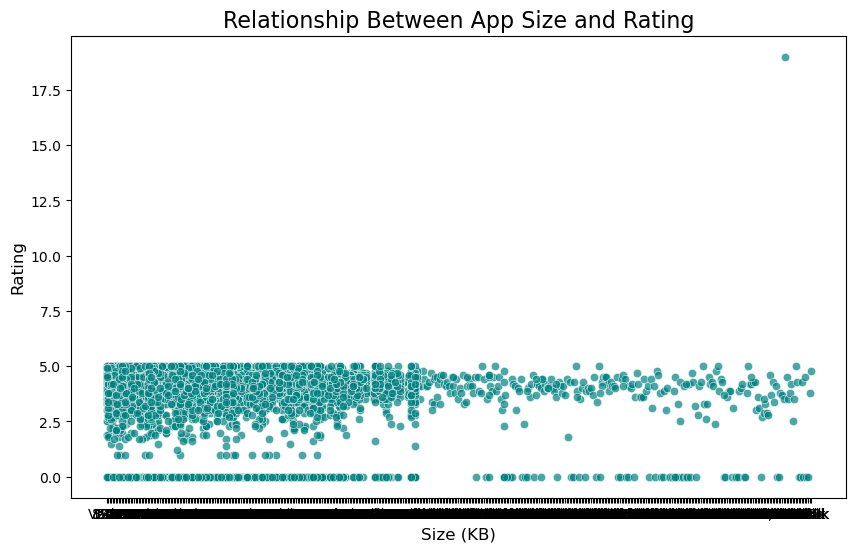

In [28]:
# Relationship Between App Size and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Size', y='Rating', alpha=0.7, color='teal')
plt.title('Relationship Between App Size and Rating', fontsize=16)
plt.xlabel('Size (KB)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

In [14]:
# Top Rated Apps by Category
top_rated_apps = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
top_rated_categories = top_rated_apps.head(10)

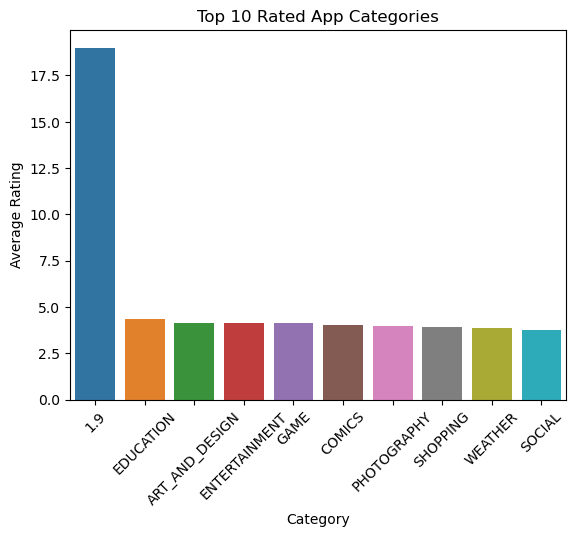

In [15]:
sns.barplot(x=top_rated_categories.index, y=top_rated_categories.values)
plt.title('Top 10 Rated App Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()